# Experiment with Lorenz Attractor

In [1]:
import sys
import warnings
import math as m
import numpy as np
import pandas as pd
import tensorly as tl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import acf

import scipy
from scipy.linalg import hankel
from scipy.signal import find_peaks
from scipy.spatial import distance_matrix

import visuals

In [2]:
plt.rcParams['font.family'] = 'DejaVu Serif'

In [3]:
def delay_embedding_matrix(s, nlags):
    """Make a matrix with delay embeddings.

    Parameters
    ----------
    s : np.array
        The time series data.

    nlags : int
        Size of time lags.

    Returns
    -------
    delay_embedding_matrix : np.array of shape  (len(s) - lags + 1 , lags)
        Matrix with lags.
    """ 
    N = len(s)
    delay_embedding_matrix = hankel(s[ : N - nlags + 1], s[N - nlags : N])
    return delay_embedding_matrix

In [4]:
def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

In [5]:
# class Autoencoder(nn.Module):
#     def __init__(self, in_shape, enc_shape):
#         super().__init__()
#         self.weight = nn.Parameter(torch.randn(in_shape, enc_shape, dtype=float))
        
#     def forward(self, x):
#         x = nn.functional.linear(x, self.weight.T)
#         x = nn.functional.linear(x, self.weight)
#         return x

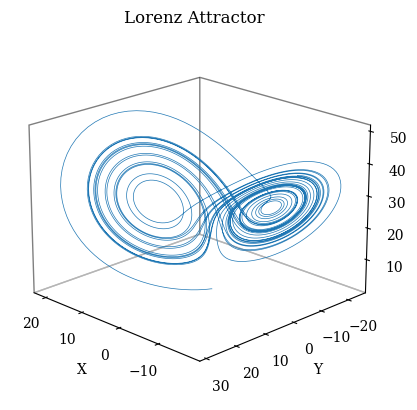

In [6]:
dt = 0.005
num_steps = 6000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., .5, .55)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.view_init(elev=20, azim=135)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
    
plt.savefig('./figs/lorenz_attractor.png', format='png', dpi=200, bbox_inches='tight')
plt.show()

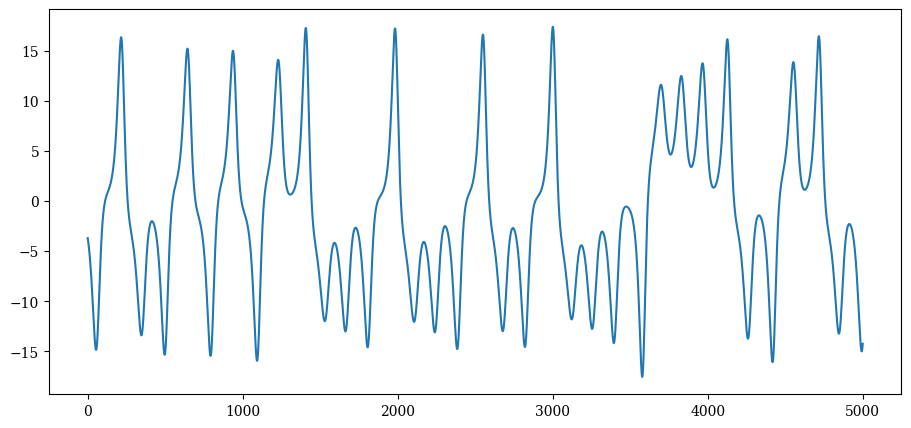

In [7]:
ax = plt.figure(figsize=(11,5)).add_subplot()
ax.plot(xyzs[1000:,0])
plt.savefig('./figs/ts_sample.png', format='png', dpi=200, bbox_inches='tight')

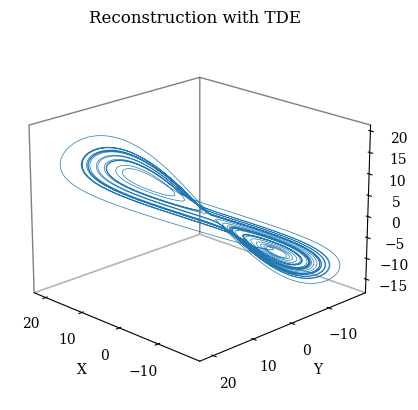

In [8]:
# Plot
ax = plt.figure().add_subplot(projection='3d')
s =  delay_embedding_matrix(xyzs[:,0],3*10)[:,::10]
ax.plot(*s.T, lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Reconstruction with TDE")

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.view_init(elev=20, azim=135)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
    
plt.savefig('./figs/tde_lorenz.png', format='png', dpi=200, bbox_inches='tight')
plt.show()

In [9]:
plt.rcParams.update({
    "text.usetex": False
})

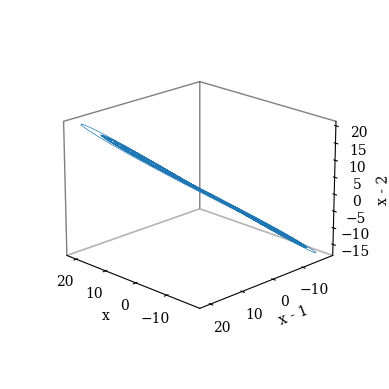

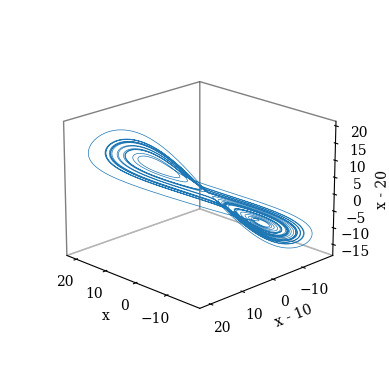

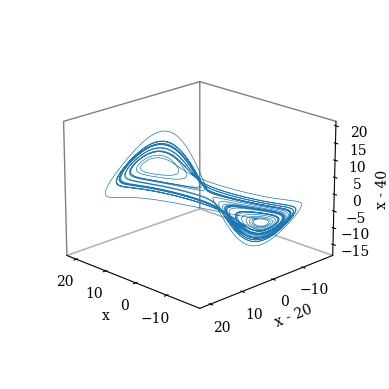

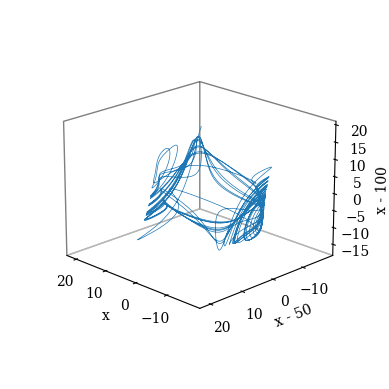

In [10]:
for tau in [1,10,20,50]:
    ax = plt.figure().add_subplot(projection='3d')
    s =  delay_embedding_matrix(xyzs[:,0],3*tau)[:,::tau]
    ax.plot(*s.T, lw=0.5)
    ax.set_xlabel("x")
    ax.set_ylabel(f"x - {tau}")
    ax.set_zlabel(f"x - {2*tau}")
    
    
    # ax.xaxis.set_rotate_label(False)
    # ax.yaxis.set_rotate_label(False)
    # ax.zaxis.set_rotate_label(False)
    ax.view_init(elev=20, azim=135)
    
    ax.grid(False)
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.set_box_aspect(aspect=None, zoom=0.8)
    plt.savefig(f'./figs/tde_lorenz_tau_{tau}.png', format='png', dpi=100, bbox_inches='tight')
    plt.show()

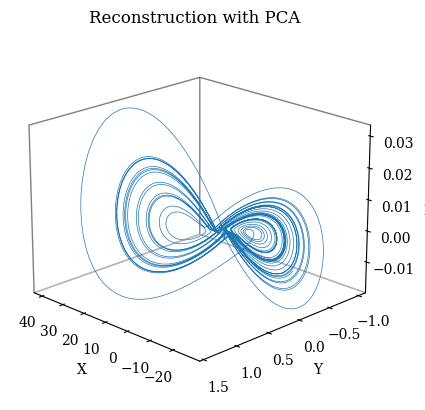

In [11]:
# Plot
ax = plt.figure().add_subplot(projection='3d')
s = PCA(n_components=3).fit_transform(delay_embedding_matrix(xyzs[::,0],3))
ax.plot(*s.T, lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Reconstruction with PCA")

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.view_init(elev=20, azim=135)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.savefig('./figs/pca_lorenz.png', format='png', dpi=200, bbox_inches='tight')

plt.show()